**Logistic Regression**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#Method to find Sigmoid
def sigmoidfunc(z):
  return 1/(1 + np.exp(-z))

#Method for Gradient Desident Learning
def gradientdescent(X,Y,iterations,alpha):
  n = X.shape[0]
  W = np.zeros((n,1))
  B = 0
  m=X.shape[1]
  cost_list=[]
  for i in range(iterations):
    z = np.dot(W.T, X) + B
    # print(z)
    prob = sigmoidfunc(z)
    derivative_weight = (1/m)*np.dot(prob-Y, X.T)
    derivative_b = (1/m)*np.sum(prob - Y)
    W = W - alpha*derivative_weight.T
    W = W.astype(dtype='float64')
    B = B - alpha*derivative_b
  return W,B

#Method to predict Classification
def predict_gender(W,B,X):
  # print(W,B,X)
  Z = np.dot(W.T, X) + B
  prob=sigmoidfunc(Z)
  # print(prob)
  if(prob>0.5):
    return 1
  return 0


#leave- one out algorithm to find accuracy and error
def leave_out(W,B,training_data,indices):
  leaveout=[]
  correct=0
  counter=0
  train=training_data
  X_train = np.array(train.iloc[:, indices], dtype='float64')
  Y_train = np.array(train['Gender'])
  # print(Y_train)
  accuracy=[]
  error=[]
  incorrect=0
  #print(training_dat)
  for i in range(training_data.shape[0]):
    leaveout=train
    leaveout=leaveout.drop(i)
    X_train = np.array(leaveout.iloc[:, indices], dtype='float64')
    Y_train = np.array(leaveout['Gender'])
    X_train = X_train.T
    Y_train = Y_train.reshape(1, X_train.shape[1])
    # print(X_train.shape)
    # print(Y_train.shape)
    # print(Y_train)
    W, B=gradientdescent(X_train, Y_train,10000,0.0001)
    # print('--------------------')
    # print(W, B, cost_list)
    # print(train.iloc[i].tolist())
    k=train.iloc[i].tolist()
    removed=[]
    for i in indices:
      removed.append(k[i])
    # print(removed)
    predicted=predict_gender(W,B,removed)
    #print(len(leaveout))
    counter+=1
    actual=k[-1]
    # print(actual)
    #print(f'Predicted :{predicted} , actual {actual},{i}')
    if(predicted==actual):
      #print(f'Predicted :{predicted} , actual {actual},{i}')
      correct+=1
    else:
      incorrect+=1
  accurate=(correct/counter)*100
  erroneous=(incorrect/counter)*100
  accuracy.append(accurate)
  error.append(erroneous)
  #print(correct,counter)
  print('Accuracy is',accuracy)
  print('Percentage of error  is:',error)
  



3a. Implementing Logistic Regression and training data(programming data)  given in the first assignment 

It works on all the different training data sets by replacing the file name


In [ ]:
training_data = pd.read_csv('sample_data/Assignement1-2b.csv')
training_data.head()
dict1 =	{
  0:'W',
  1: 'M',
}
#replacing the last column to 0 & 1 values
training_data.loc[(training_data.Gender == dict1[0]),'Gender']=0
training_data.loc[(training_data.Gender == dict1[1]),'Gender']=1
print(f'Training Data \n{training_data}')
X_train = np.array(training_data.iloc[:, [0, 1, 2]], dtype='float64')
Y_train = np.array(training_data['Gender'])
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])
# print(X_train.shape)
# print(Y_train.shape)
# print(Y_train)
W, B=gradientdescent(X_train, Y_train,10000,0.0001)
# print('Training Data is ',training_data)
print('Plese enter test data point')
test_data=[]
test_data.append(float(input('Enter Height: ').strip()))
test_data.append(float(input('Enter weight: ').strip()))
test_data.append(float(input('Age: ').strip()))
# X=[1.794980,88.006699,22]
print(dict1)
print(f'Predicted Gender {dict1[predict_gender(W,B,test_data)]}')


Training Data 
       Height     Weight  Age Gender
0    1.798398  72.545354   29      0
1    1.791747  78.826072   30      0
2    1.768286  69.288869   28      0
3    1.794980  88.006699   22      1
4    1.730018  71.812933   29      0
..        ...        ...  ...    ...
115  1.867702  81.756014   29      0
116  1.860046  85.407862   21      0
117  1.719635  67.618484   31      0
118  1.797409  73.415660   26      0
119  1.673339  68.645445   25      0

[120 rows x 4 columns]
Plese enter test data point
Enter Height:  1.798398 
Enter weight: 72.545354
Age: 29
{0: 'W', 1: 'M'}
Predicted Gender W


**Predicting the gender by training the data given and making the predictions of test data given in Assignment-1**

In [ ]:
train_2a = pd.read_csv('sample_data/Assigment1-2a.csv')
train_2a.head()
dict1 =	{
  0:'W',
  1: 'M',
}
#replacing the last column to 0 & 1 values
train_2a.loc[(train_2a.Gender == dict1[0]),'Gender']=0
train_2a.loc[(train_2a.Gender == dict1[1]),'Gender']=1
print(f'Training Data \n{train_2a}')
X_train = np.array(train_2a.iloc[:, [0, 1, 2]], dtype='float64')
Y_train = np.array(train_2a['Gender'])
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])
# print(X_train.shape)
# print(Y_train.shape)
# print(Y_train)
W, B=gradientdescent(X_train, Y_train,10000,0.0001)
# print('Training Data is ',training_data)
test_dat=pd.read_csv('sample_data/Assignment1-2a-test_data.csv')
test_dat=test_dat.values.tolist()
print(dict1)
for i in test_dat:
  print(f'Predicted Gender of {i} is {dict1[predict_gender(W,B,i)]}')

# X=[1.794980,88.006699,22]



Training Data 
      Height     Weight  Age Gender
0   1.701405  65.566680   30      0
1   1.720535  76.550072   24      1
2   1.822002  75.864366   30      1
3   1.798131  77.153155   32      1
4   1.682933  72.689806   34      1
5   1.696417  77.602946   33      1
6   1.608518  71.551220   32      1
7   1.781264  75.889964   29      1
8   1.563862  65.452412   23      0
9   1.859292  65.008421   32      0
10  1.589277  59.922276   32      0
11  1.836276  75.017003   31      0
12  1.618345  65.827949   30      0
13  1.503679  55.426141   27      0
{0: 'W', 1: 'M'}
Predicted Gender of [1.816359375, 76.2084063, 41.0] is W
Predicted Gender of [1.678594558, 66.38138295, 35.0] is W
Predicted Gender of [1.358094966, 50.62872198, 30.0] is W
Predicted Gender of [1.890832926, 78.62041861, 30.0] is M



**3b) Plot the resulting separating surface together with the data points (using your favorite plotting program, e.g. Matlab, Octave, ...). To do this plotting you need to project the data and function into
into one or more 2D space. The best visual results will be if projection is done along the separating
hyperplane (i.e. into a space described by the normal of the hyperplane and one of the dimension
within the hyperplane).**

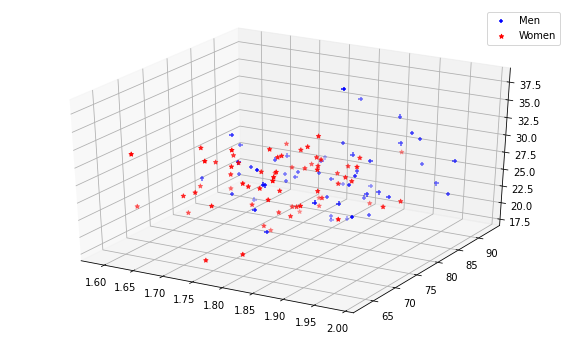

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
man=training_data[training_data.Gender == 1]
women=training_data[training_data.Gender == 0]
ax = fig.add_subplot(111, projection='3d')
ax.scatter(man['Height'],man['Weight'],man['Age'],color="blue", marker="+")
ax.scatter(women['Height'],women['Weight'],women['Age'],color="red", marker="*")
plt.legend(['Men','Women'])
plt.show()

**c) Evaluate the performance of your logistic regression classifier in the same way as for Homework
1 using leve-one-out validation and compare the results with the ones for KNN and Naive Bayes
(either from your first assignment or, if you did not implement these, using an existing implementation). Discuss what differences exist and why one method might outperform the others for this
problem.**


ans: 1. The leave-one out accuracy for naive bayes on Programming data was 71.667

2.The leave- one out accuracy for K-nearest neighbors on programming data was 70.83333333333334 for the best k-value =5

3. The leave-out accuracy for the logistic regression on programmin data was 60 

Naives Bayes classifier performed well when compared to other algorithmes for the given data, as it is takes the posterior of and takes  all data points(Generative Model), logistic is discriminative     

In [ ]:
indices=[0,1,2]#considers all parameters for leave-one out
leave_out(W,B,training_data,indices)

Accuracy is [60.0]
Percentage of error  is: [40.0]


d.  Evaluate the performance of your logistic regression classifier in the same way as for Homework 1 using leve-one-out validation and compare the results with the ones for KNN and Naive Bayes (either from your first assignment or, if you did not implement these, using an existing implementation). Discuss what differences exist and why one method might outperform the others for this problem.

1. The leave out accuracy with KNN on programming data is 72.5 for k value 1.
2. The leave one out accuracy with  Naives bayes is  70.83333333333334
3. The leave one out accuracy with Logistic Regression is 55.833

The accuracies of all the algorithms decreased when the age attribute is removed.

Naives Bayes classifier performed well when compared to other algorithmes for the given data, as it is takes the posterior of and takes all data points(Generative Model), logistic is discriminative

In [ ]:
#3d Removing age column and calling leave -one out algorithm
indices=[0,1]#only considers height,weight columns
leave_out(W,B,training_data,indices)


Accuracy is [55.833333333333336]
Percentage of error  is: [44.166666666666664]
